In [ ]:
# prompt: auto EDA libraries in python like Sweetviz?
import pandas as pd

# standard libraries
import pandas as pd
import numpy as np
import os
from google.colab import drive
drive.mount('/content/drive')

# ML/stats
from mlxtend.plotting import heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# for splitting the data
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report



# visualizations
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import plotly.express as px

%matplotlib inline

# tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/WIDS-Datathon-2024/Data/Train/'
df = pd.read_csv(path + 'training.csv')
df.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [ ]:
df.shape

(12906, 83)

In [ ]:
# prompt: write code to display the columns that have more than 50% null values and  drop columns that have more than 50% null values.
columns_with_more_than_50_percent_null_values = [column for column in df.columns if df[column].isnull().sum() / len(df) > 0.5]

print(columns_with_more_than_50_percent_null_values)

#df.drop(columns_with_more_than_50_percent_null_values, axis=1, inplace=True)

['bmi', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']


In [ ]:
# prompt: drop only metastatic_first_novel_treatment and metastatic_first_novel_treatment_type columns

df.drop(columns=['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'], axis=1, inplace=True)


In [ ]:
df.shape

(12906, 81)

In [ ]:
# Drop null values
df_new = df.dropna()

print(df_new.head())
print(df_new.shape)


    patient_id patient_race          payer_type patient_state  patient_zip3  \
1       349367        White          COMMERCIAL            CA           928   
2       138632        White          COMMERCIAL            TX           760   
17      971531     Hispanic  MEDICARE ADVANTAGE            IL           606   
21      198037        White            MEDICAID            KY           402   
27      907418        White  MEDICARE ADVANTAGE            IN           460   

    patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
1            62              F  28.49                       C50411   
2            43              F  38.09                       C50112   
17           83              F  30.00                       C50911   
21           45              F  25.00                       C50312   
27           50              F  25.08                         1749   

                         breast_cancer_diagnosis_desc  ...   disabled  \
1   Malig neoplm of upper-outer

In [ ]:
target_counts = df_new["DiagPeriodL90D"].value_counts()

# Display the count of variables in each class of the target variable
print(target_counts)

1    975
0    678
Name: DiagPeriodL90D, dtype: int64


In [ ]:
# Separate features (X) and target variable (y)
X = df_new.drop("DiagPeriodL90D", axis=1)
y = df_new["DiagPeriodL90D"]
# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy="majority", random_state=42)
# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)
# Create a new DataFrame with balanced classes
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)
# Check the new class distribution
balanced_target_counts = df_balanced["DiagPeriodL90D"].value_counts()
print(balanced_target_counts)
print(df_balanced.shape)

0    678
1    678
Name: DiagPeriodL90D, dtype: int64
(1356, 81)


In [ ]:
split_path = '/content/drive/MyDrive/WIDS-Datathon-2024/split/'

In [ ]:
features = ['patient_id','patient_race', 'payer_type', 'patient_state', 'patient_zip3', 'patient_gender', 'breast_cancer_diagnosis_code',
'metastatic_cancer_diagnosis_code','breast_cancer_diagnosis_desc','Region', 'Division', 'patient_age','bmi', 'population', 'density', 'age_median',
'male', 'female', 'married', 'family_size', 'income_household_median', 'income_household_six_figure', 'home_ownership', 'housing_units', 'home_value',
'rent_median', 'education_college_or_above', 'labor_force_participation', 'unemployment_rate', 'race_white', 'race_black', 'race_asian',
'race_native', 'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s',
 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'divorced', 'never_married', 'widowed', 'family_dual_income', 'income_household_under_5',
 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35',
'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over',
'income_individual_median', 'poverty', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college',
'education_bachelors', 'education_graduate', 'education_stem_degree', 'self_employed', 'farmer', 'disabled', 'limited_english', 'commute_time',
'health_uninsured', 'veteran', 'Ozone', 'PM25', 'N02']

In [ ]:
def prepare_and_split_data(df, target_column, features, split_path, test_size=0.2, random_state=42):
    # Select only the specified features and the target column
    df_selected = df[features + [target_column]]

    # Split the data into X (features) and y (target)
    X = df_selected.drop(target_column, axis=1)
    y = df_selected[target_column]

    # Split the data into training (80%) and validation (20%) sets while ensuring both classes are represented
    X_train, X_temp_val, y_train, y_temp_val = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    # Further split the temporary validation set into two parts, one for each class
    X_val_class0 = X_temp_val[y_temp_val == 0]
    X_val_class1 = X_temp_val[y_temp_val == 1]

    # Calculate the number of samples to include from each class for a balanced validation set
    num_samples_per_class = min(len(X_val_class0), len(X_val_class1))

    # Sample an equal number of samples from each class
    X_val_class0_sampled = X_val_class0.sample(n=num_samples_per_class, random_state=random_state)
    X_val_class1_sampled = X_val_class1.sample(n=num_samples_per_class, random_state=random_state)

    # Combine the sampled validation sets for both classes
    X_val_sampled = pd.concat([X_val_class0_sampled, X_val_class1_sampled])
    y_val_sampled = y_temp_val.loc[X_val_sampled.index]

    # Save the train and sampled validation sets to CSV files
    train_df = pd.concat([X_train, y_train], axis=1)
    val_df = pd.concat([X_val_sampled, y_val_sampled], axis=1)

    train_df.to_csv(split_path + "train.csv", index=False)
    val_df.to_csv(split_path + "val.csv", index=False)

'''
Function call
'''
prepare_and_split_data(df_balanced, "DiagPeriodL90D", features, split_path)

In [ ]:
train_val_path = '/content/drive/MyDrive/WIDS-Datathon-2024/split/'
train_df = pd.read_csv(train_val_path + 'train.csv')
val_df = pd.read_csv(train_val_path + 'val.csv')

In [ ]:
print(train_df.shape)
print(val_df.shape)

(1084, 81)
(272, 81)


In [ ]:
column_names = train_df.columns
print(column_names)

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_gender', 'breast_cancer_diagnosis_code',
       'metastatic_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'Region', 'Division', 'patient_age', 'bmi', 'population', 'density',
       'age_median', 'male', 'female', 'married', 'family_size',
       'income_household_median', 'income_household_six_figure',
       'home_ownership', 'housing_units', 'home_value', 'rent_median',
       'education_college_or_above', 'labor_force_participation',
       'unemployment_rate', 'race_white', 'race_black', 'race_asian',
       'race_native', 'race_pacific', 'race_other', 'race_multiple',
       'hispanic', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s',
       'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'divorced',
       'never_married', 'widowed', 'family_dual_income',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_

In [ ]:
# def preprocess_data(df, categorical_columns):
#     # One-hot encode the categorical variables
#     df_encoded = pd.get_dummies(df, columns=categorical_columns)

#     # Convert "patient_gender" to binary (F as 1 and M as 0)
#     df_encoded["patient_gender"] = df_encoded["patient_gender"].apply(lambda x: 1 if x == "F" else 0)

#     return df_encoded
def preprocess_data(df, categorical_columns):
    # One-hot encode the categorical variables, excluding 'patient_id'
    df_encoded = pd.get_dummies(df.drop(columns=['patient_id']), columns=categorical_columns)

    # Convert "patient_gender" to binary (F as 1 and M as 0)
    df_encoded["patient_gender"] = df_encoded["patient_gender"].apply(lambda x: 1 if x == "F" else 0)

    # Keep 'patient_id' in the DataFrame
    df_encoded['patient_id'] = df['patient_id']

    return df_encoded

In [ ]:
def scale_continuous_features(train_df, val_df, continuous_columns):
    # Initialize the MinMaxScaler for continuous variables
    scaler = MinMaxScaler((0, 1)).fit(train_df[continuous_columns])

    # Normalize the continuous variables separately
    train_df[continuous_columns] = scaler.transform(train_df[continuous_columns])
    val_df[continuous_columns] = scaler.transform(val_df[continuous_columns])

    return train_df, val_df

In [ ]:
# List of original categorical columns before one-hot encoding
categorical_columns = [
    "patient_race",
    "payer_type",
    "patient_state",
    "patient_zip3",
    "breast_cancer_diagnosis_code",
    "breast_cancer_diagnosis_desc",
    "metastatic_cancer_diagnosis_code",
    "Region",
    "Division"
]

# Concatenate the training and validation dataframes for consistent one-hot encoding
combined_df = pd.concat([train_df, val_df], sort=False)

# Apply one-hot encoding and gender conversion
combined_df_encoded = preprocess_data(combined_df, categorical_columns)

# Split back into training and validation sets
train_df_encoded = combined_df_encoded.iloc[:len(train_df)]
val_df_encoded = combined_df_encoded.iloc[len(train_df):]

# Identify columns resulting from one-hot encoding
one_hot_columns = [col for col in combined_df_encoded.columns if any(col.startswith(original_col) for original_col in categorical_columns)]

# Identify continuous columns
continuous_columns = [col for col in train_df_encoded.columns if col not in one_hot_columns and col not in categorical_columns and col != 'patient_id']

# Scale continuous features
train_df_encoded, val_df_encoded = scale_continuous_features(train_df_encoded, val_df_encoded, continuous_columns)

# Check if scaling is done correctly
print(train_df_encoded[continuous_columns].head())

   patient_gender  patient_age       bmi  population   density  age_median  \
0             0.0     0.616438  0.355999    0.018642  0.000499    0.602242   
1             0.0     0.890411  0.251691    0.599319  0.118142    0.400367   
2             0.0     0.657534  0.285511    0.533056  0.040320    0.278913   
3             0.0     0.890411  0.364543    0.521905  0.098369    0.429547   
4             0.0     0.657534  0.567818    0.298579  0.029838    0.288036   

       male    female   married  family_size  ...    farmer  disabled  \
0  0.605552  0.394522  0.889729     0.274070  ...  0.777255  0.183717   
1  0.515076  0.484924  0.617788     0.697327  ...  0.000732  0.116443   
2  0.566852  0.433148  0.626206     0.773552  ...  0.020967  0.218930   
3  0.538911  0.461089  0.627642     0.601508  ...  0.001203  0.118203   
4  0.723047  0.276953  0.309895     0.352647  ...  0.006997  0.304780   

   limited_english  commute_time  health_uninsured   veteran     Ozone  \
0         0.031820

<ipython-input-18-231232253cd7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[continuous_columns] = scaler.transform(train_df[continuous_columns])
<ipython-input-18-231232253cd7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[continuous_columns] = scaler.transform(val_df[continuous_columns])


In [ ]:
# Function to split the data into features and target
# def split_features_target(df, target_column_name):
#     X = df.drop(target_column_name, axis=1)
#     y = df[target_column_name]
#     return X, y
def split_features_target(df, target_column_name):
    # Keep a copy of patient_id before dropping it from features
    patient_id = df['patient_id']
    X = df.drop([target_column_name, 'patient_id'], axis=1)
    y = df[target_column_name]
    return X, y, patient_id

# Specify the name of the target column
target_column = "DiagPeriodL90D"

# Split train_df_encoded and val_df_encoded into features (X), target (y), and retain patient_id
train_x, train_y, train_patient_id = split_features_target(train_df_encoded, target_column)
val_x, val_y, val_patient_id = split_features_target(val_df_encoded, target_column)


In [ ]:
print(train_x.columns)
print(val_x.columns)

Index(['patient_gender', 'patient_age', 'bmi', 'population', 'density',
       'age_median', 'male', 'female', 'married', 'family_size',
       ...
       'Region_South', 'Region_West', 'Division_East North Central',
       'Division_East South Central', 'Division_Middle Atlantic',
       'Division_Mountain', 'Division_Pacific', 'Division_South Atlantic',
       'Division_West North Central', 'Division_West South Central'],
      dtype='object', length=617)
Index(['patient_gender', 'patient_age', 'bmi', 'population', 'density',
       'age_median', 'male', 'female', 'married', 'family_size',
       ...
       'Region_South', 'Region_West', 'Division_East North Central',
       'Division_East South Central', 'Division_Middle Atlantic',
       'Division_Mountain', 'Division_Pacific', 'Division_South Atlantic',
       'Division_West North Central', 'Division_West South Central'],
      dtype='object', length=617)


In [ ]:
print(train_x.shape)
print(train_y.shape)

(1084, 617)
(1084,)


In [ ]:
def build_model(input_features, learning_rate=0.005):
  tf.keras.backend.clear_session()
  model = tf.keras.Sequential()

  # Set input layer
  model.add(tf.keras.Input(shape=(input_features.shape[1],), name='Input'))

  # Add output layer for binary classification
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', name='Output'))

  # Compile model for binary classification
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])

  return model

In [ ]:
def visualize(model_history):
  # visualize the loss and accuracy
  fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))

  axes[0].plot(model_history.history['loss'], color='purple', label='losses')
  axes[0].plot(model_history.history['val_loss'], color='orange', label='val_losses')
  axes[0].set_xlabel('Epoch')
  axes[0].set_ylabel('Loss')
  axes[0].set_title('Loss Progression')
  axes[0].legend()

  axes[1].plot(model_history.history['accuracy'], color='purple', label='accuracy')
  axes[1].plot(model_history.history['val_accuracy'], color='orange', label='val_accuracy')
  axes[1].set_xlabel('Epoch')
  axes[1].set_ylabel('Accuracy')
  axes[1].set_title('Accuracy Progression')
  axes[1].legend()
  plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(train_y)
train_y = label_encoder.transform(train_y)
val_y = label_encoder.transform(val_y)
classes = list(label_encoder.inverse_transform([0,1]))
classes

[0.0, 1.0]

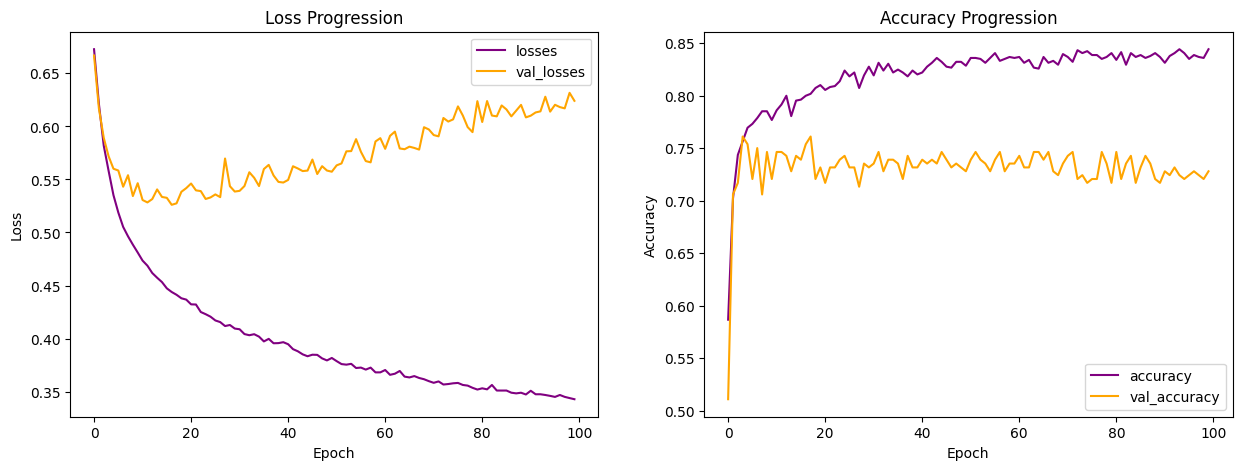

In [ ]:
input_features = train_x
learning_rate = 0.005

#Build the model
model = build_model(input_features, learning_rate)
history = model.fit(
   x=train_x,
   y=train_y,
   epochs=100,
   validation_data=(val_x, val_y),
   batch_size=32,
   verbose=0)

visualize(history)

In [ ]:
train_results = {}
val_results = {}

In [ ]:
display((train_y == 0).sum()/len(train_y))
display((train_y == 1).sum()/len(train_y))

0.5

0.5

In [ ]:
train_yhat_probs = model.predict(train_x)
val_yhat_probs = model.predict(val_x)


9/9 [==============================] - 0s 2ms/step


In [ ]:
# Create the submission DataFrame with probability scores
submission = pd.DataFrame({
    'patient_id': val_patient_id,
    'DiagPeriodL90D': val_y,   # True target values
    'prediction_probability': val_yhat_probs.flatten()  # Model's probability scores
})

result_path = '/content/drive/MyDrive/HS/'

# Save the submission DataFrame to a CSV file
submission.to_csv(result_path + 'submission.csv', index=False)

In [ ]:
# predict using the training set
train_yhat_probs = model.predict(train_x)
# Assuming a threshold of 0.5 for classification
train_yhat_result = (train_yhat_probs > 0.5).astype(int)
train_yhat_result

34/34 [==============================] - 0s 1ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
classes = ["Not Diagnosed within 90 Days", "Diagnosed within 90 Days"]

print('\nTraining Classification Report\n')
print(classification_report(train_y, train_yhat_result, target_names=classes))


Training Classification Report

                              precision    recall  f1-score   support

Not Diagnosed within 90 Days       0.91      0.77      0.83       542
    Diagnosed within 90 Days       0.80      0.92      0.86       542

                    accuracy                           0.84      1084
                   macro avg       0.85      0.84      0.84      1084
                weighted avg       0.85      0.84      0.84      1084



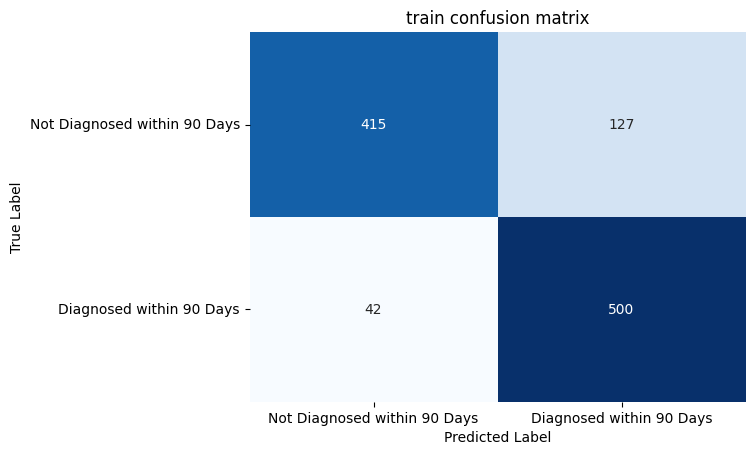

In [ ]:
# calculate the confusion matrix
train_cm = tf.math.confusion_matrix(train_y, train_yhat_result)

# use a heatmap to display the confusion matrix
ax = sns.heatmap(train_cm,
                 annot=True,
                 fmt='.0f',
                 cmap='Blues',
                 xticklabels=classes,
                 yticklabels=classes,
                 cbar=False)

# add axis labels
ax.set(xlabel='Predicted Label',ylabel='True Label')
plt.title('train confusion matrix')
plt.show()

In [ ]:
# predict using the training set
val_yhat_probs = model.predict(val_x)
# Assuming a threshold of 0.5 for classification
val_yhat_result = (val_yhat_probs > 0.5).astype(int)
val_yhat_result

9/9 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [ ]:
classes = ["Not Diagnosed within 90 Days", "Diagnosed within 90 Days"]

print('\nTraining Classification Report\n')
print(classification_report(val_y, val_yhat_result, target_names=classes))


Training Classification Report

                              precision    recall  f1-score   support

Not Diagnosed within 90 Days       0.73      0.70      0.71       136
    Diagnosed within 90 Days       0.71      0.74      0.73       136

                    accuracy                           0.72       272
                   macro avg       0.72      0.72      0.72       272
                weighted avg       0.72      0.72      0.72       272



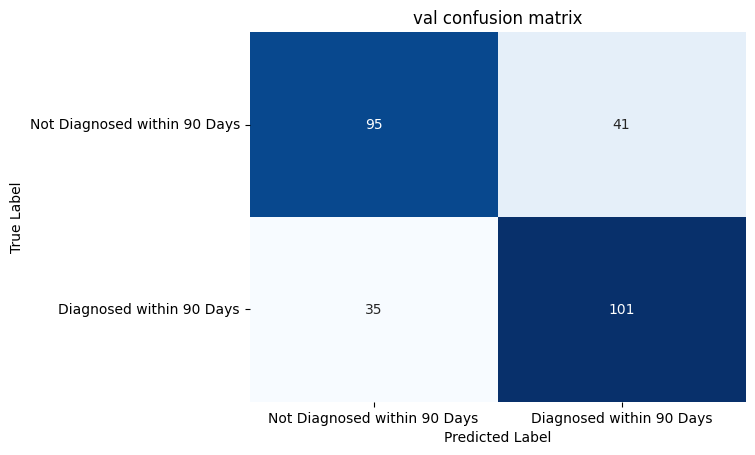

In [ ]:
# calculate the confusion matrix
val_cm = tf.math.confusion_matrix(val_y, val_yhat_result)

# use a heatmap to display the confusion matrix
ax = sns.heatmap(val_cm,
                 annot=True,
                 fmt='.0f',
                 cmap='Blues',
                 xticklabels=classes,
                 yticklabels=classes,
                 cbar=False)

# add axis labels
ax.set(xlabel='Predicted Label',ylabel='True Label')
plt.title('val confusion matrix')
plt.show()